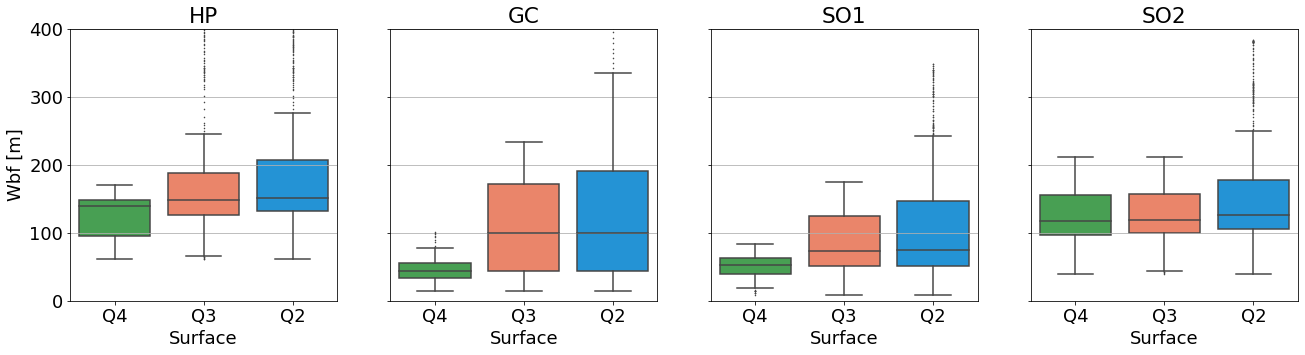

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import numpy as np

mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 18})


fans = ['HP', 'GC', 'SO1', 'SO2']
surfaces = ['Q4', 'Q3', 'Q2']


data_dir = os.path.join('Death_Valley_Surfaces', 'Surfaces_New_19_08_2020', 'tables')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22,5), sharey=True, squeeze=True)

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]

field_widths = {}

fan_width_limits = {'HP':{}, 'GC':{}, 'SO1':{}, 'SO2':{}}

for idx, fn in enumerate(fans):
    
    width_df = pd.DataFrame(columns={'surface', 'distance', 'width'})
    
    width_df_surface_Q4 = pd.read_csv(os.path.join(data_dir, fn+'_Q4.csv'))

    width_df_surface_Q3 = pd.read_csv(os.path.join(data_dir, fn+'_Q3.csv'))

    width_df_surface_Q3 = width_df_surface_Q3.append(width_df_surface_Q4)

    width_df_surface_Q2 = pd.read_csv(os.path.join(data_dir, fn+'_Q2.csv'))

    width_df_surface_Q2 = width_df_surface_Q2.append(width_df_surface_Q3).append(width_df_surface_Q4)

    width_df_surface_Q4['surface'] = 'Q4'
    width_df_surface_Q3['surface'] = 'Q3'
    width_df_surface_Q2['surface'] = 'Q2'

    width_df = width_df.append([width_df_surface_Q4, width_df_surface_Q3, width_df_surface_Q2], 
                               ignore_index=True)
    
    field_widths[fn] = width_df
    
    ax[idx].grid('on')
    cmap = plt.get_cmap('jet')
    sns.boxplot(x="surface", y="width", data=width_df, whis=1, ax=ax[idx], palette=surface_palette, fliersize=0.7)
    ax[idx].set_ylim([0, 400])
    ax[idx].set_title(fn)
    
    fan_width_limits[fn]['Q4'] = [np.percentile(width_df_surface_Q4.width,10),
                                  np.percentile(width_df_surface_Q4.width,50), np.percentile(width_df_surface_Q4.width,90)]
    fan_width_limits[fn]['Q3'] = [np.percentile(width_df_surface_Q3.width,10),np.percentile(width_df_surface_Q3.width,50),
                                  np.percentile(width_df_surface_Q3.width,90)]
    fan_width_limits[fn]['Q2'] = [np.percentile(width_df_surface_Q2.width,10),np.percentile(width_df_surface_Q2.width,50),
                                  np.percentile(width_df_surface_Q2.width,90)]

    if idx > 0:
        ax[idx].set_ylabel('')
    else:
        ax[idx].set_ylabel('Wbf [m]')
        
    ax[idx].set_xlabel('Surface')
plt.show()




In [2]:
import pickle

pickle.dump(fan_width_limits, open( "field_widths.p", "wb" ) )
